### 1.Load data

In [14]:
pip install --user python_dateutil-2.7.0-py2.py3-none-any.whl

Processing ./python_dateutil-2.7.0-py2.py3-none-any.whl
python-dateutil is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [15]:
# Importing all the necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import show
from matplotlib import rcParams

In [16]:
# Read the data from excel file "data"
df= pd.read_excel("data.xls")
#print initial row of dataset
df.head()


,Time,Date,FTSE100,FTSE_growth,GDP_growth
0,Q1_2009,2009-03-31,4033.764444,NaN,-2.2
1,Q2_2009,2009-06-30,4263.800820,2.408638,0.3
2,Q3_2009,2009-09-30,4714.689231,4.365616,0.8
3,Q4_2009,2009-12-31,5236.469531,4.558551,-0.5
4,Q1_2010,2010-03-31,5431.032698,1.584384,1.6


In [17]:
#dimension of dataframe
df.shape

(52, 5)

there are 52 rows and 4 collums

In [18]:
#information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Time         52 non-null     object        
 1   Date         52 non-null     datetime64[ns]
 2   FTSE100      52 non-null     float64       
 3   FTSE_growth  51 non-null     float64       
 4   GDP_growth   51 non-null     float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 2.2+ KB


There are 1 missing data in FTSE growth and 1 in GDP growth. These rows need to be eliminated

In [19]:
#convert date to timestamp
df['Date'] = pd.to_datetime(df['Date'])
df.set_index("Date", inplace = True)

# Displaying first 5 rows of "data" DataFrame
df.head()


,Time,FTSE100,FTSE_growth,GDP_growth
Date,,,,
2009-03-31,Q1_2009,4033.764444,NaN,-2.2
2009-06-30,Q2_2009,4263.800820,2.408638,0.3
2009-09-30,Q3_2009,4714.689231,4.365616,0.8
2009-12-31,Q4_2009,5236.469531,4.558551,-0.5
2010-03-31,Q1_2010,5431.032698,1.584384,1.6


### 2.Exploratory data analysis

### 2.1 Data cleaning

In [20]:
#drop null values
df1 =df.dropna()
df1.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2009-06-30 to 2021-09-30
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         50 non-null     object 
 1   FTSE100      50 non-null     float64
 2   FTSE_growth  50 non-null     float64
 3   GDP_growth   50 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.0+ KB


In [21]:
df1.head()

,Time,FTSE100,FTSE_growth,GDP_growth
Date,,,,
2009-06-30,Q2_2009,4263.800820,2.408638,0.3
2009-09-30,Q3_2009,4714.689231,4.365616,0.8
2009-12-31,Q4_2009,5236.469531,4.558551,-0.5
2010-03-31,Q1_2010,5431.032698,1.584384,1.6
2010-06-30,Q2_2010,5356.017377,-0.604044,1.7


In [22]:
#drop FTSE100 price and time columns
df1= df1.drop(['Time', 'FTSE100'], 1)
df1 =df1.round(decimals=1)     #round up to 1 d.p 
df1.head()





/var/folders/y0/_1dwc0_92297kxbll1_zhl980000gn/T/ipykernel_1796/2248262503.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df1= df1.drop(['Time', 'FTSE100'], 1)


,FTSE_growth,GDP_growth
Date,,
2009-06-30,2.4,0.3
2009-09-30,4.4,0.8
2009-12-31,4.6,-0.5
2010-03-31,1.6,1.6
2010-06-30,-0.6,1.7


### 2.2 Descriptive statistic

In [23]:
df1.describe()

,FTSE_growth,GDP_growth
count,50.000000,50.000000
mean,0.480000,0.870000
std,2.083463,2.649625
min,-5.900000,-13.100000
25%,-0.300000,0.600000
50%,0.550000,0.900000
75%,1.575000,1.400000
max,4.600000,11.900000


### 2.3. Univariate analysis

##### Distribution of variables

/Users/nothingsgoodb/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/nothingsgoodb/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


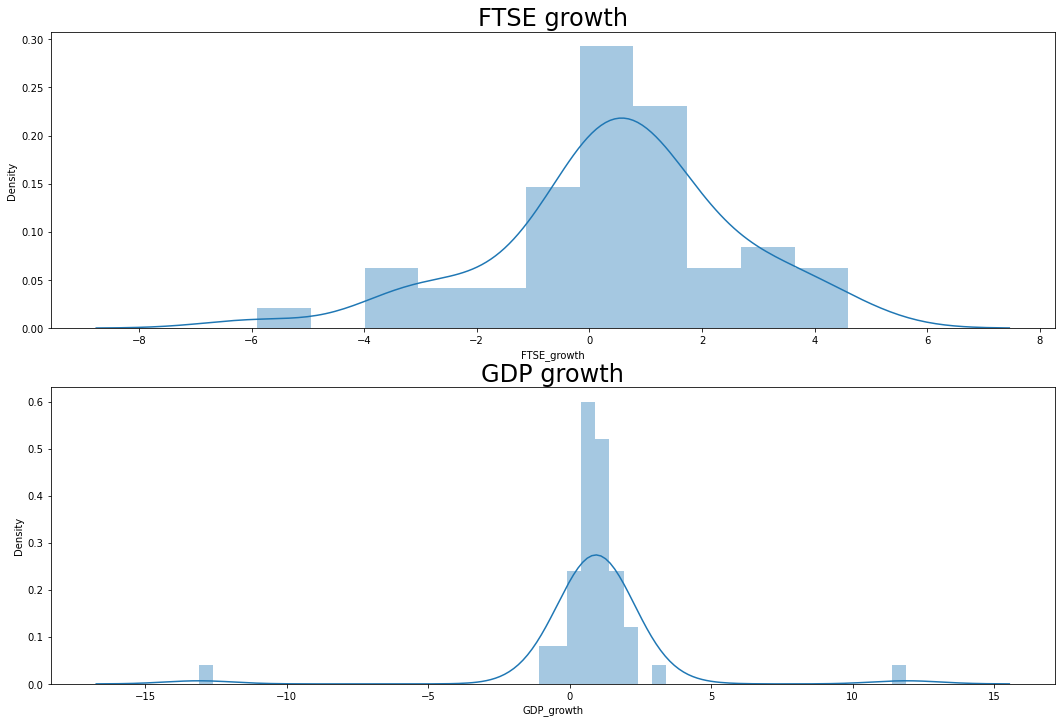

In [24]:
# Distribution of continuous variables 

# Setting the figure size
plt.rcParams["figure.figsize"] = 18, 12

# Defining 2 subplots one below the other
fig, axes = plt.subplots(2, 1)

# Plotting the distributions in the respective subplots
sns.distplot(df1['FTSE_growth'], ax = axes[0])
sns.distplot(df1['GDP_growth'], ax = axes[1])

# Setting the title for each subplot
axes[0].set_title("FTSE growth", size = 24)
axes[1].set_title("GDP growth", size = 24)


# Displaying the plot
plt.show()

It can be seen both distributions are not normal. In fact they are slightly right-skewed. Therefore, the use of transer entrophy will be more suitable than G-causality

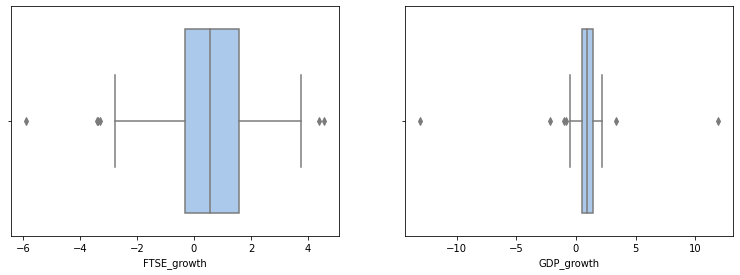

In [25]:
# outliers detection in numerical columns
num_features = [num for num, dtype in df1.dtypes.items() if dtype == 'int64' or dtype == 'float64']

# Box plot of all continuous variable
plt.figure(figsize=(20,60))
plotnumber =1
for num_feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data = df, x = num_feature, palette='pastel')
    plt.xlabel(num_feature)
    plotnumber+=1
plt.show()

both of series have outliers. It's worth keeping them for further analysis


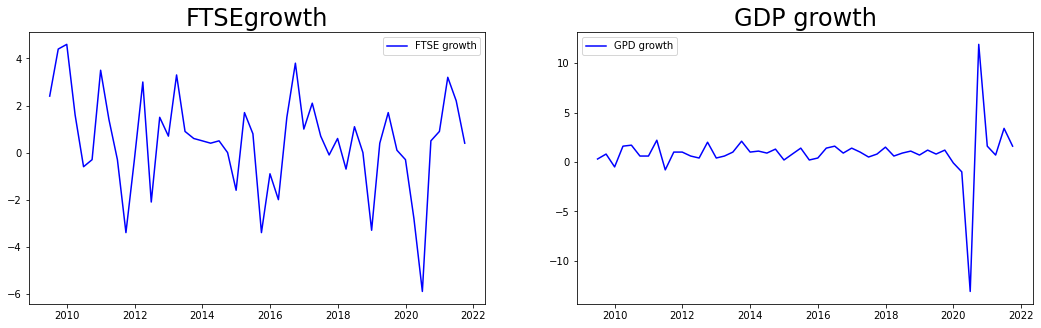

In [26]:
# Setting the figure size 
plt.rcParams["figure.figsize"] = (18, 5)

# Subdividing the figure into 32figures stacked in 1 row
fig, ax = plt.subplots(1, 2)

# First Plot - FTSE growth against time
ax[0].plot(df1['FTSE_growth'], color = "blue", label = "FTSE growth")
ax[0].set_title("FTSEgrowth", size = 24)
ax[0].legend()
# Second Plot - GDP growth against time
ax[1].plot(df1['GDP_growth'], color = "blue", label = "GPD growth")
ax[1].set_title("GDP growth", size = 24)
ax[1].legend()

Both seires fluctuates over the time and do not shows any clear upward or downward trend.
GDP growth  growth seems to stay stable despite a spike in mid 2020-2021.

FTSEgrowth, however, seems to shows to shows sign of periodic cycles. To be specific, the bottom points tend to falls
toward end of year 2012,2016 and then start of 2020 while the market reach its peak growth at 2010,2013, mid 2016 and mid 2019.

It's worth noting that start of 2020 where there is a deep strike in both  series is also the time the global pandemic
Covid -19  prevails, which is an important event that severely affect any economy and stock market.

### 2.4. Stationary test

Only in a stationary series, we can be sure of the fact that the underlying distribution of the data will not change in future. 

The  Augmented-Dickey Fuller (ADF) Test is used to check the stationarity of a series. 

The test has the following 2 hypothesis:

Null Hypothesis (H0): Series has a unit root, or it is not stationary.

Alternate Hypothesis (H1): Series has no unit root, or it is stationary.

    
If the p-value of the statistic is less than the confidence levels 5% (0.05),  
then the Null Hypothesis is rejected and we could conclude that the series is stationary.

In [92]:
# Importing the necessary package
from statsmodels.tsa.stattools import adfuller

# ADF test in FTSE growth
adfuller(df1['FTSE_growth'])




(-5.065889335732805,
 1.6410581209957058e-05,
 0,
 49,
 {'1%': -3.5714715250448363,
  '5%': -2.922629480573571,
  '10%': -2.5993358475635153},
 159.12452191407635)

-t-stat value is -5.0659 (rounded to 4 d.p)

-p-value js 1.6411 

-number of lag used: 0

-number of observation: 49

The dictionary shows statistic value at each confidence level. 

It can be seen that p-value (1.6410581209957058e-05) is close to zero and smaller than critcal value (0.05). Thus we could reject the null hypothesis

The FTSE_growth series is stationary.

In [61]:
# ADF Test on GDP growth
adfuller(df1['GDP_growth'][1:])

NameError: name 'adfuller' is not defined

Similarly, as the p-value( 5.841794809195266e-17) is smaller than 0.05.. 

Therefore the null hypothesis could be rejected. 

The GDP_growth series is stationary.


### 2.5. Cointegration test -Johansen test

To test for conitegration between time series, Johansen test is implemented. 
In the Johansen test, lambda is checked whether it has a zero eigenvalue. When all the eigenvalues are zero, that would mean that the series are not cointegrated, whereas when some of the eigenvalues contain negative values, it would imply that a linear combination of the time series can be created, which would result in stationarity.

In [98]:
#define johansen function. 
#This function developed by James LeSage at the Department of Economics, University of Toledo

import numpy as np
from numpy import zeros, ones, flipud, log
from numpy.linalg import inv, eig, cholesky as chol
from statsmodels.regression.linear_model import OLS


tdiff = np.diff

class Holder(object):
    pass

def rows(x):
    return x.shape[0]

def trimr(x, front, end):
    if end > 0:
        return x[front:-end]
    else:
        return x[front:]

import statsmodels.tsa.tsatools as tsat
mlag = tsat.lagmat

def mlag_(x, maxlag):
    '''return all lags up to maxlag
    '''
    return x[:-lag]

def lag(x, lag):
    return x[:-lag]

def detrend(y, order):
    if order == -1:
        return y
    return OLS(y, np.vander(np.linspace(-1, 1, len(y)), order + 1)).fit().resid

def resid(y, x):
    r = y - np.dot(x, np.dot(np.linalg.pinv(x), y))
    return r




def coint_johansen(x, p, k, print_on_console=True):

    #    % error checking on inputs
    #    if (nargin ~= 3)
    #     error('Wrong # of inputs to johansen')
    #    end
    nobs, m = x.shape

    # why this?  f is detrend transformed series, p is detrend data
    if (p > -1):
        f = 0
    else:
        f = p

    x = detrend(x, p)
    dx = tdiff(x, 1, axis=0)
    # dx    = trimr(dx,1,0)
    z = mlag(dx, k)  # [k-1:]
#    print z.shape
    z = trimr(z, k, 0)
    z = detrend(z, f)
#    print dx.shape
    dx = trimr(dx, k, 0)

    dx = detrend(dx, f)
    # r0t   = dx - z*(z\dx)
    r0t = resid(dx, z)  # diff on lagged diffs
    # lx = trimr(lag(x,k),k,0)
    lx = lag(x, k)
    lx = trimr(lx, 1, 0)
    dx = detrend(lx, f)
#    print 'rkt', dx.shape, z.shape
    # rkt   = dx - z*(z\dx)
    rkt = resid(dx, z)  # level on lagged diffs
    skk = np.dot(rkt.T, rkt) / rows(rkt)
    sk0 = np.dot(rkt.T, r0t) / rows(rkt)
    s00 = np.dot(r0t.T, r0t) / rows(r0t)
    sig = np.dot(sk0, np.dot(inv(s00), (sk0.T)))
    tmp = inv(skk)
    # du, au = eig(np.dot(tmp, sig))
    au, du = eig(np.dot(tmp, sig))  # au is eval, du is evec
    # orig = np.dot(tmp, sig)

    # % Normalize the eigen vectors such that (du'skk*du) = I
    temp = inv(chol(np.dot(du.T, np.dot(skk, du))))
    dt = np.dot(du, temp)


    # JP: the next part can be done much  easier

    # %      NOTE: At this point, the eigenvectors are aligned by column. To
    # %            physically move the column elements using the MATLAB sort,
    # %            take the transpose to put the eigenvectors across the row

    # dt = transpose(dt)

    # % sort eigenvalues and vectors

    # au, auind = np.sort(diag(au))
    auind = np.argsort(au)
    # a = flipud(au)
    aind = flipud(auind)
    a = au[aind]
    # d = dt[aind,:]
    d = dt[:, aind]

    # %NOTE: The eigenvectors have been sorted by row based on auind and moved to array "d".
    # %      Put the eigenvectors back in column format after the sort by taking the
    # %      transpose of "d". Since the eigenvectors have been physically moved, there is
    # %      no need for aind at all. To preserve existing programming, aind is reset back to
    # %      1, 2, 3, ....

    # d  =  transpose(d)
    # test = np.dot(transpose(d), np.dot(skk, d))

    # %EXPLANATION:  The MATLAB sort function sorts from low to high. The flip realigns
    # %auind to go from the largest to the smallest eigenvalue (now aind). The original procedure
    # %physically moved the rows of dt (to d) based on the alignment in aind and then used
    # %aind as a column index to address the eigenvectors from high to low. This is a double
    # %sort. If you wanted to extract the eigenvector corresponding to the largest eigenvalue by,
    # %using aind as a reference, you would get the correct eigenvector, but with sorted
    # %coefficients and, therefore, any follow-on calculation would seem to be in error.
    # %If alternative programming methods are used to evaluate the eigenvalues, e.g. Frame method
    # %followed by a root extraction on the characteristic equation, then the roots can be
    # %quickly sorted. One by one, the corresponding eigenvectors can be generated. The resultant
    # %array can be operated on using the Cholesky transformation, which enables a unit
    # %diagonalization of skk. But nowhere along the way are the coefficients within the
    # %eigenvector array ever changed. The final value of the "beta" array using either method
    # %should be the same.


    # % Compute the trace and max eigenvalue statistics */
    lr1 = zeros(m)
    lr2 = zeros(m)
    cvm = zeros((m, 3))
    cvt = zeros((m, 3))
    iota = ones(m)
    t, junk = rkt.shape
    for i in range(0, m):
        tmp = trimr(log(iota - a), i , 0)
        lr1[i] = -t * np.sum(tmp, 0)  # columnsum ?
        # tmp = np.log(1-a)
        # lr1[i] = -t * np.sum(tmp[i:])
        lr2[i] = -t * log(1 - a[i])
        cvm[i, :] = c_sja(m - i, p)
        cvt[i, :] = c_sjt(m - i, p)
        aind[i] = i
    # end

    result = Holder()
    # % set up results structure
    # estimation results, residuals
    result.rkt = rkt
    result.r0t = r0t
    result.eig = a
    result.evec = d  # transposed compared to matlab ?
    result.lr1 = lr1
    result.lr2 = lr2
    result.cvt = cvt
    result.cvm = cvm
    result.ind = aind
    result.meth = 'johansen'

    if print_on_console == True:
        print ('--------------------------------------------------')
        print ('--> Trace Statistics')
        print ('variable statistic Crit-90% Crit-95%  Crit-99%')
        for i in range(len(result.lr1)):
            print ('r =', i, '\t', round(result.lr1[i], 4), result.cvt[i, 0], result.cvt[i, 1], result.cvt[i, 2])
        print ('--------------------------------------------------')
        print ('--> Eigen Statistics')
        print ('variable statistic Crit-90% Crit-95%  Crit-99%')
        for i in range(len(result.lr2)):
            print ('r =', i, '\t', round(result.lr2[i], 4), result.cvm[i, 0], result.cvm[i, 1], result.cvm[i, 2])
        print ('--------------------------------------------------')
        print ('eigenvectors:\n', result.evec)
        print ('--------------------------------------------------')
        print ('eigenvalues:\n', result.eig)
        print ('--------------------------------------------------')


    return result

def c_sjt(n, p):

# PURPOSE: find critical values for Johansen trace statistic
# ------------------------------------------------------------
# USAGE:  jc = c_sjt(n,p)
# where:    n = dimension of the VAR system
#               NOTE: routine doesn't work for n > 12
#           p = order of time polynomial in the null-hypothesis
#                 p = -1, no deterministic part
#                 p =  0, for constant term
#                 p =  1, for constant plus time-trend
#                 p >  1  returns no critical values
# ------------------------------------------------------------
# RETURNS: a (3x1) vector of percentiles for the trace
#          statistic for [90# 95# 99#]
# ------------------------------------------------------------
# NOTES: for n > 12, the function returns a (3x1) vector of zeros.
#        The values returned by the function were generated using
#        a method described in MacKinnon (1996), using his FORTRAN
#        program johdist.f
# ------------------------------------------------------------



    jcp0 = ((2.9762, 4.1296, 6.9406),
            (10.4741, 12.3212, 16.3640),
            (21.7781, 24.2761, 29.5147),
            (37.0339, 40.1749, 46.5716),
            (56.2839, 60.0627, 67.6367),
            (79.5329, 83.9383, 92.7136),
            (106.7351, 111.7797, 121.7375),
            (137.9954, 143.6691, 154.7977),
            (173.2292, 179.5199, 191.8122),
            (212.4721, 219.4051, 232.8291),
            (255.6732, 263.2603, 277.9962),
            (302.9054, 311.1288, 326.9716))


    jcp1 = ((2.7055, 3.8415, 6.6349),
            (13.4294, 15.4943, 19.9349),
            (27.0669, 29.7961, 35.4628),
            (44.4929, 47.8545, 54.6815),
            (65.8202, 69.8189, 77.8202),
            (91.1090, 95.7542, 104.9637),
            (120.3673, 125.6185, 135.9825),
            (153.6341, 159.5290, 171.0905),
            (190.8714, 197.3772, 210.0366),
            (232.1030, 239.2468, 253.2526),
            (277.3740, 285.1402, 300.2821),
            (326.5354, 334.9795, 351.2150))

    jcp2 = ((2.7055, 3.8415, 6.6349),
            (16.1619, 18.3985, 23.1485),
            (32.0645, 35.0116, 41.0815),
            (51.6492, 55.2459, 62.5202),
            (75.1027, 79.3422, 87.7748),
            (102.4674, 107.3429, 116.9829),
            (133.7852, 139.2780, 150.0778),
            (169.0618, 175.1584, 187.1891),
            (208.3582, 215.1268, 228.2226),
            (251.6293, 259.0267, 273.3838),
            (298.8836, 306.8988, 322.4264),
            (350.1125, 358.7190, 375.3203))



    if (p > 1) or (p < -1):
        jc = (0, 0, 0)
    elif (n > 12) or (n < 1):
        jc = (0, 0, 0)
    elif p == -1:
        jc = jcp0[n - 1]
    elif p == 0:
        jc = jcp1[n - 1]
    elif p == 1:
        jc = jcp2[n - 1]



    return jc

def c_sja(n, p):





    jcp0 = ((2.9762, 4.1296, 6.9406),
            (9.4748, 11.2246, 15.0923),
            (15.7175, 17.7961, 22.2519),
            (21.8370, 24.1592, 29.0609),
            (27.9160, 30.4428, 35.7359),
            (33.9271, 36.6301, 42.2333),
            (39.9085, 42.7679, 48.6606),
            (45.8930, 48.8795, 55.0335),
            (51.8528, 54.9629, 61.3449),
            (57.7954, 61.0404, 67.6415),
            (63.7248, 67.0756, 73.8856),
            (69.6513, 73.0946, 80.0937))

    jcp1 = ((2.7055, 3.8415, 6.6349),
            (12.2971, 14.2639, 18.5200),
            (18.8928, 21.1314, 25.8650),
            (25.1236, 27.5858, 32.7172),
            (31.2379, 33.8777, 39.3693),
            (37.2786, 40.0763, 45.8662),
            (43.2947, 46.2299, 52.3069),
            (49.2855, 52.3622, 58.6634),
            (55.2412, 58.4332, 64.9960),
            (61.2041, 64.5040, 71.2525),
            (67.1307, 70.5392, 77.4877),
            (73.0563, 76.5734, 83.7105))

    jcp2 = ((2.7055, 3.8415, 6.6349),
            (15.0006, 17.1481, 21.7465),
            (21.8731, 24.2522, 29.2631),
            (28.2398, 30.8151, 36.1930),
            (34.4202, 37.1646, 42.8612),
            (40.5244, 43.4183, 49.4095),
            (46.5583, 49.5875, 55.8171),
            (52.5858, 55.7302, 62.1741),
            (58.5316, 61.8051, 68.5030),
            (64.5292, 67.9040, 74.7434),
            (70.4630, 73.9355, 81.0678),
            (76.4081, 79.9878, 87.2395))


    if (p > 1) or (p < -1):
        jc = (0, 0, 0)
    elif (n > 12) or (n < 1):
        jc = (0, 0, 0)
    elif p == -1:
        jc = jcp0[n - 1]
    elif p == 0:
        jc = jcp1[n - 1]
    elif p == 1:
        jc = jcp2[n - 1]


    return jc


In [102]:
#implement johansen test
coint_johansen(df1,0,1)



--------------------------------------------------
--> Trace Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 63.6003 13.4294 15.4943 19.9349
r = 1 	 21.204 2.7055 3.8415 6.6349
--------------------------------------------------
--> Eigen Statistics
variable statistic Crit-90% Crit-95%  Crit-99%
r = 0 	 42.3963 12.2971 14.2639 18.52
r = 1 	 21.204 2.7055 3.8415 6.6349
--------------------------------------------------
eigenvectors:
 [[ 0.31836521 -0.56781773]
 [-0.73404073 -0.06285246]]
--------------------------------------------------
eigenvalues:
 [0.58656558 0.35708914]
--------------------------------------------------


###### Trace Statistic 
The trace statistics let us know whether the sum of the eigenvalues is 0. 

-Null hypothesis: There is no cointegrating equation
-Alternative hypothesis: The number of cointegrating relationships is at least one 

Critical value at 95% confidence level is 15.4943, smaller than trace statistic. 

Therefore the null hypothesis could be rejected.
###### Eigen statistic
The eigen statistics stores the eigenvalues in decreasing order of magnitude,which represent how strongly cointegrated the series are or how strong is the tendency to mean revert. 

-Null hypothesis: the cointegrating rank is k

-Alter native hypothesis: cointegrating rank is k+1 

In this case, as eigen statistic is 42.3993,larger than critical value at 95% confidence level of 14.2639, the eigen statistic for the null hypothesis is rejected.

Therefore it could be concluded that two series are cointegrated. This indicate a statistically significant long run relationship between  FTSE growth and GDP growth.

### 3. Causality analysis

### 3.1. VAR (Vector autoregression) model & G-causality

### 3.1.1. VAR model

Since all time series are stationay and cointegrated,a Vector Autorgression model (VAR) could be implemented to discover causality relationship between the variables.

#### i) Select  the Order(P) of VAR model
To select the order the the model, we iteratively fit increasing orders of VAR model then choose the order giving a model with least AIC.


In [31]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic


model = VAR(df1)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  3.1959722061925873
BIC :  3.427623671267358
FPE :  24.44141161916107
HQIC:  3.2838604489203154 

Lag Order = 2
AIC :  3.150608326387128
BIC :  3.5404418703262723
FPE :  23.385712417565387
HQIC:  3.297926992067326 

Lag Order = 3
AIC :  3.145100061343315
BIC :  3.696207857597375
FPE :  23.32590546280762
HQIC:  3.352485627275162 

Lag Order = 4
AIC :  3.2859019402093423
BIC :  4.0014572692702925
FPE :  27.00774805218883
HQIC:  3.5539532551199473 

Lag Order = 5
AIC :  3.3263110171723245
BIC :  4.20956823439337
FPE :  28.40359073859369
HQIC:  3.6555804395109996 

Lag Order = 6
AIC :  3.3872935019301744
BIC :  4.441587376518238
FPE :  30.679768990034056
HQIC:  3.7782764964642768 

Lag Order = 7
AIC :  3.4958154906581687
BIC :  4.724559757421119
FPE :  35.05589032180304
HQIC:  3.948938401607748 

Lag Order = 8
AIC :  3.7136590709434856
BIC :  5.1203440000300215
FPE :  45.2378755217123
HQIC:  4.229264732714017 

Lag Order = 9
AIC :  3.6604818494612763
BIC :  5.2486705942

/Users/nothingsgoodb/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency BQ-DEC will be used.
  warnings.warn('No frequency information was'


AIC drops to lowest(3.1451) at lag =3 then start to increase at lag =4. Therefore lag =3 will be sued for the model.

#### ii) Fit VAR model with selected lag

In [33]:

model_fitted = model.fit(3)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, Jan, 2022
Time:                     14:30:22
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    3.69621
Nobs:                     47.0000    HQIC:                   3.35249
Log likelihood:          -193.290    FPE:                    23.3259
AIC:                      3.14510    Det(Omega_mle):         17.6704
--------------------------------------------------------------------
Results for equation FTSE_growth
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.131937         0.373253            0.353           0.724
L1.FTSE_growth         0.219066         0.174064            1.259           0.208
L1.GDP_growth          0.040386         0.136556  

#### iii) Serial Correlation of Residuals test 
Durbin-Watson test is conducted to test if here is any correlation left in the residuals.
If so, there is still pattern in the time series that is left to be explained by the model.
In that case, it is necessary to  either:
+ increase the order of the model or
+ induce more predictors into the system or 
+ look for a different algorithm to model the time series
 
The value of Durbin-Watson statistic can vary between 0 and 4.
+ The closer it is to the value 2, then there is no significant serial correlation. 
+ The closer to 0, there is a positive serial correlation, and 
+ The closer it is to 4 implies negative serial correlation.

In [36]:

from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df1.columns, out):
    print(col, ':', round(val, 2))

FTSE_growth : 2.07
GDP_growth : 2.04


The statistic value is close to 2 so thetr is no serial correlation need to be concerned about here.

#### iv) Equation from VAR outcome 

+ GDP_growth =0.323287x L1.FTSE_growth -0.070959xL2.FTSE_growth-0.321051x L2.GDP_growth -0.057486x L3.FTSE_growth -0.112749x L3.GDP_growth  (1)


+ FTSE_growth= 0.131937+0.219066x L1.FTSE_growth+0.040386x L1.GDP_growth -0.194891x L2.FTSE_growth-0.321051x L2.GDP_growth-0.057486xL3.FTSE_growth  -0.112749x L3.GDP_growth (2)

Outcome from VAR models implies the existence of bidirectional causality between GDP growth and FTSE100 growth.
It's worth noting that in Equation (1) the coefficients of FTSE growth and GDP growth at lag=2  is considerably larger compare to others.This indicates the growth of GDP at time t is significantly impacted by the growth of FTSE growth and its past avlue at time (t-2)

### 3.1.2. Granger causality test

Granger causality tets is conducted to test the long term causality between GDP growth and FTSE growth

In [27]:
df1.head()

,FTSE_growth,GDP_growth
Date,,
2009-06-30,2.4,0.3
2009-09-30,4.4,0.8
2009-12-31,4.6,-0.5
2010-03-31,1.6,1.6
2010-06-30,-0.6,1.7


In [28]:
#implement Granger causality test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df1 = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df1.columns:
        for r in df1.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df1.loc[r, c] = min_p_value
    df1.columns = [var + '_x' for var in variables]
    df1.index = [var + '_y' for var in variables]
    return df1

    


In [29]:
grangers_causation_matrix(df1, variables = df1.columns, test='ssr_chi2test', verbose=False)    

,FTSE_growth_x,GDP_growth_x
FTSE_growth_y,1.0000,0.0028
GDP_growth_y,0.0185,1.0000


It can be observed that p-value of predictive values x is 0.0028< 0.05(critical value at 95% confidence). 

Therefore the null hypothesis is rejected. GDP growth granger causes FTSE growth.

On the other hand  p-value of 0.0185<0.05 also indicates that  FTSE growth Granger causes GDP growth.

Thus, it is obvious that these two time series interchangeably causing each other.


### 3. 2. Transfer entrophy method


In [11]:
pip install PyIF

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install -e 


Usage:   
  /Users/nothingsgoodb/opt/anaconda3/bin/python -m pip install [options] <requirement specifier> [package-index-options] ...
  /Users/nothingsgoodb/opt/anaconda3/bin/python -m pip install [options] -r <requirements file> [package-index-options] ...
  /Users/nothingsgoodb/opt/anaconda3/bin/python -m pip install [options] [-e] <vcs project url> ...
  /Users/nothingsgoodb/opt/anaconda3/bin/python -m pip install [options] [-e] <local project path> ...
  /Users/nothingsgoodb/opt/anaconda3/bin/python -m pip install [options] <archive url/path> ...

-e option requires 1 argument
Note: you may need to restart the kernel to use updated packages.


In [49]:
from PyIF import te_compute as te
import numpy as np

In [39]:
#convert series from dataframe to array
FTSEgrowth = df1['FTSE_growth'].values
GDPgrowth =df1['GDP_growth'].values
type(GDPgrowth)
type(FTSEgrowth)





numpy.ndarray

In [50]:
print(GDPgrowth, FTSEgrowth)

[  0.3   0.8  -0.5   1.6   1.7   0.6   0.6   2.2  -0.8   1.    1.    0.6
   0.4   2.    0.4   0.6   1.    2.1   1.    1.1   0.9   1.3   0.2   0.8
   1.4   0.2   0.4   1.4   1.6   0.9   1.4   1.    0.5   0.8   1.5   0.6
   0.9   1.1   0.7   1.2   0.8   1.2  -0.1  -1.  -13.1  11.9   1.6   0.7
   3.4   1.6] [ 2.4  4.4  4.6  1.6 -0.6 -0.3  3.5  1.4 -0.3 -3.4 -0.3  3.  -2.1  1.5
  0.7  3.3  0.9  0.6  0.5  0.4  0.5  0.  -1.6  1.7  0.8 -3.4 -0.9 -2.
  1.5  3.8  1.   2.1  0.7 -0.1  0.6 -0.7  1.1  0.  -3.3  0.4  1.7  0.1
 -0.3 -2.8 -5.9  0.5  0.9  3.2  2.2  0.4]


In [64]:
TE = te.te_compute(FTSEgrowth, GDPgrowth, k=1, embedding=1, safetyCheck=False, GPU=False)

print(TE)

0.2086437445014666


This means that the history of the X process has 0.209 bits of additional information for predicting the next value of Y. (i.e., it provides information about the future of Y, in addition to what we know from the history of Y).

Since it is non-zero, it can be concluded that X(FTSE growth) influences Y(GDP growth) in some way.



In [56]:
#calculate entrophy of Y(GDP growth)
import scipy.stats

def ent(data):
    """Calculates entropy of the passed `pd.Series`
    """
    p_data = data.value_counts()           # counts occurrence of each value
    entropy = scipy.stats.entropy(p_data)  # get entropy from counts
    return entropy

In [58]:
data=df1['GDP_growth'] 
type(data) 
ent(data)

3.0596745643122922

In [60]:
#normalized TE by devidiing it by maximum value, which is Y entrophy
TE_normalized =TE/ent(data)
print(TE_normalized)

0.06819148249786572


It can be seen the TE from FTSEgrowth to GDP growth is not significant, only about 6.8%